In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred=y_pred)
print(confmat)

[[52  8]
 [ 3 80]]


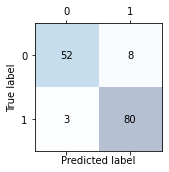

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# 정밀도(Precision)과 재현율(Recall)
- ### 정밀도(P) = TP / (FP + TP)
- ### 재현율(R) = TP / (FN + TP)
- ### 정확도(A) = (TN + TP) / (TN + FP + FN + TP)
- ### 오류율(E) = (FN + FP) / (TN + FP + FN + TP)

In [4]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('정밀도 {}'.format(precision))
print('재현율 {}'.format(recall))

정밀도 0.9090909090909091
재현율 0.963855421686747


# F1 Score(F-measure)
- ## 정밀도와 재현율을 결합한 지표
- ## 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가짐
##  F1-Score = 2*(precision * recall) / (precision + recall)

In [5]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print('F1 Score: {}'.format(f1))

F1 Score: 0.935672514619883


# ROC 곡선과 AUC
- ## ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
- ### TPR(True Positive Rate): TP / (FN + TP), 재현율
- ### TNR(True Negative Rate): TN / (FP + TN)
- ### FPR(False Positive Rate): FP / (FP + TN), 1 -  TNR
- ## AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 값(1에 가까울수록 좋은 값)

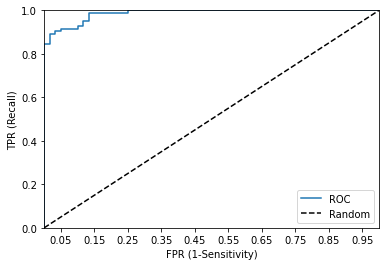

In [6]:
import numpy as np
from sklearn.metrics import roc_curve

pred_proba = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0, 1], [0, 1], '--k', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR (1-Sensitivity)')
plt.ylabel('TPR (Recall)')
plt.legend();

In [7]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

print('ROC AUC Score: {}'.format(roc_auc))

ROC AUC Score: 0.9152610441767068
